In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #to split data in training and testing
from sklearn.linear_model import LogisticRegression  #model type
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #evaluation tools accuracy,precision,recall,score
import warnings   #to ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/tested.csv') #to load dataset

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.shape #no of rows,columns

(418, 12)

In [ ]:
df.columns #all columns names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.drop(columns =['PassengerId'],inplace = True) #removing a column permanently

In [ ]:
df.shape

(418, 11)

In [ ]:
df.isnull().sum()  #to check null values

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [ ]:
df.drop(columns =['Cabin'],inplace = True)

In [ ]:
df.shape

(418, 10)

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


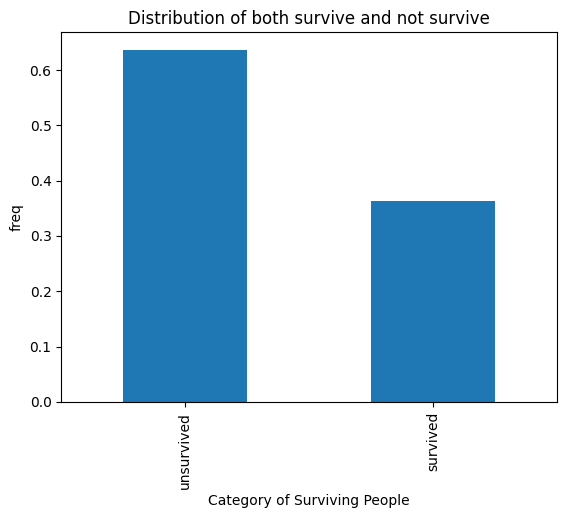

In [ ]:
df['Survived'].value_counts(normalize= True).rename({0:'unsurvived',1:'survived'}).plot(kind = 'bar')
plt.xlabel('Category of Surviving People')
plt.ylabel('freq')
plt.title('Distribution of both survive and not survive')
plt.show()

In [ ]:
df.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

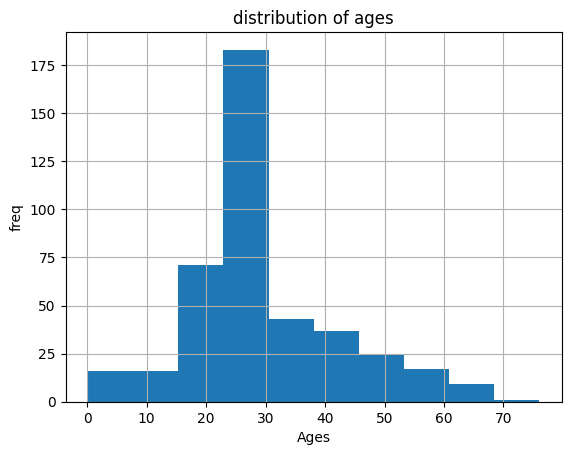

In [ ]:
df['Age'].hist()
plt.xlabel('Ages')
plt.ylabel('freq')
plt.title('distribution of ages')
plt.show()

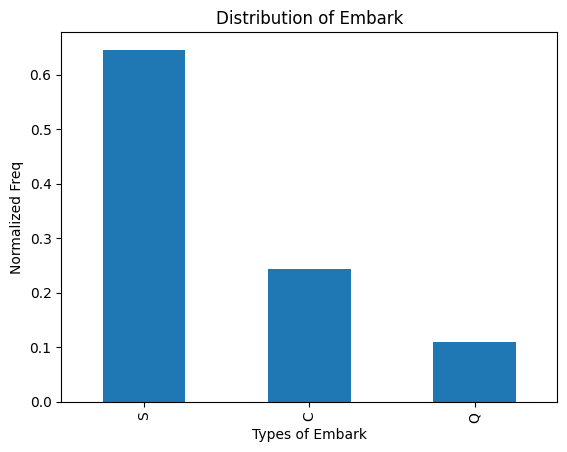

In [ ]:
df['Embarked'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Types of Embark')
plt.ylabel('Normalized Freq')
plt.title('Distribution of Embark')
plt.show()

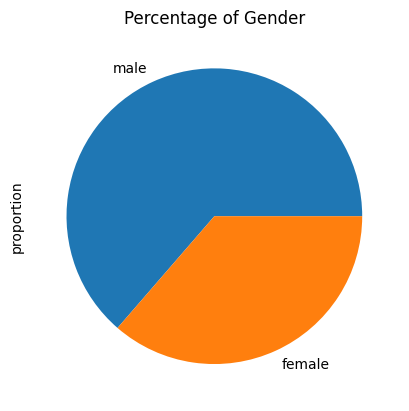

In [ ]:
df['Sex'].value_counts(normalize=True).plot(kind='pie')
plt.title('Percentage of Gender')
plt.show()

In [ ]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [ ]:
emb = pd.get_dummies(df['Embarked'])

In [ ]:
emb

,C,Q,S
0,False,True,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,False,True
...,...,...,...
413,False,False,True
414,True,False,False
415,False,False,True
416,False,False,True


In [ ]:
emb=emb.astype(int)

In [ ]:
emb

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [ ]:
sex = sex.astype(int)

In [ ]:
sex

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [ ]:
df =pd.concat([df,sex,emb],axis = 1) #concatenated our axis = 1 for column,axis =1 for row
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,0,1
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,0
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,0,1


In [ ]:
df.shape

(418, 14)

In [ ]:
df = df.rename({'male': 'Gender',
                "C": "emb_c",
                "Q":"emb_q",
                "S":"emb_s"}, axis  = 1)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,emb_c,emb_q,emb_s
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,0,1
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,0
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,0,1


In [ ]:
df.drop(columns =['Name','Ticket','Sex','Embarked'],axis = 1,inplace = True)

In [ ]:
df.shape

(418, 10)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        1
Gender      0
emb_c       0
emb_q       0
emb_s       0
dtype: int64

In [ ]:
df.dropna(inplace = True) #to delete single null value

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Gender      0
emb_c       0
emb_q       0
emb_s       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Gender    417 non-null    int64  
 7   emb_c     417 non-null    int64  
 8   emb_q     417 non-null    int64  
 9   emb_s     417 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 35.8 KB


In [ ]:
x = df.drop(columns = ['Survived']) #independent variables k liye target exclude krdiya
y =df['Survived']   #target variable/dependent variabe = y

In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,emb_c,emb_q,emb_s
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0
3,3,27.0,0,0,8.6625,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state = 42) #partition for training and testing

In [ ]:
x_train.shape

(333, 9)

In [ ]:
x_test.shape

(84, 9)

In [ ]:
y_train.shape

(333,)

In [ ]:
y_test.shape

(84,)

In [ ]:
model=LogisticRegression() #assigning variable name

In [ ]:
model.fit(x_train,y_train) #model train hogaya

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)#model performance testing

In [ ]:
print(y_pred)

[1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 0 1 1 0]


In [ ]:
print(y_test.values)

[1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 0 1 1 0]


In [ ]:
confusion_matrix(y_pred,y_test)

array([[50,  0],
       [ 0, 34]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
acc = accuracy_score(y_pred,y_test)

In [ ]:
print("Logistic Regression Accuracy: {:.2f}%".format(acc*100))

Logistic Regression Accuracy: 100.00%
